In [2]:
import sklearn
from sklearn.datasets import load_digits

In [3]:
digits=load_digits()

In [7]:
X=digits.data
y=digits.target

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [12]:
DT=DecisionTreeClassifier(random_state=1)

In [30]:
#point 1
def write_answer_1(score):
    with open("bagging1.txt", "w") as fout:
        fout.write(str(score))
cross_val_score(DT,X,y,cv=10).mean()
write_answer_1(cross_val_score(DT,X,y,cv=10).mean())

In [36]:
#point 2

Bagging_DT_100_trees=BaggingClassifier(DecisionTreeClassifier(),n_estimators=100).fit(X,y)
print(cross_val_score(Bagging_DT_100_trees,X,y,cv=10).mean())
write_answer_1(cross_val_score(Bagging_DT_100_trees,X,y,cv=10).mean())

In [62]:
#point 3
number_features=X.shape[1]**(1/2)/X.shape[1]
Bagging_DT_1_tree_sqrt_d=BaggingClassifier(DecisionTreeClassifier(random_state=1),max_features=number_features,n_estimators=100).fit(X,y)
score=cross_val_score(Bagging_DT_1_tree_sqrt_d,X,y,cv=10).mean()
print(score)


0.9265518311607697


In [67]:
#point 4
DT_sqrt_features=DecisionTreeClassifier(max_features="sqrt")
Bagging_DT_1_tree_sqrt_d_every_leaf=BaggingClassifier(DT_sqrt_features,n_estimators=100).fit(X,y)
score1=cross_val_score(Bagging_DT_1_tree_sqrt_d_every_leaf,X,y,cv=10).mean()
print(score1)
write_answer_1(score1)

0.9510273122284294


In [76]:
from sklearn import ensemble,model_selection
import numpy as np
RF=ensemble.RandomForestClassifier().fit(X,y)
score2=cross_val_score(RF,X,y,cv=10).mean()
print(score2)
write_answer_1(score2)

0.9515797641216635


In [79]:
np.arange(10,100,10).size

9

In [84]:
score=np.zeros(np.arange(10,100,10).size)
score[8]

0.0

In [90]:
np.arange(tree_numbers.size)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [106]:
tree_numbers=np.arange(10,210,10)
score=np.zeros(tree_numbers.size)
for number in range(tree_numbers.size):
    RF=ensemble.RandomForestClassifier(n_estimators=tree_numbers[number]).fit(X,y)
    score2=cross_val_score(RF,X,y,cv=10).mean()
    score[number]=score2


Populating the interactive namespace from numpy and matplotlib


/Users/ekaterinakryukova/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['number']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0, 0.5, 'score')

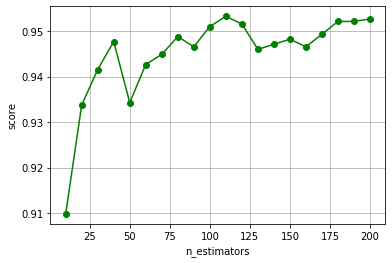

In [107]:
%pylab inline
pylab.grid(True)
pylab.plot(tree_numbers, score, 'g-', marker='o', label='train')
pylab.xlabel('n_estimators')
pylab.ylabel('score')

#pylab.ylim((0.0, 1.05))
#pylab.legend(loc='lower right')

In [98]:
max_features_in_node=np.arange(sqrt(X.shape[1]),X.shape[1],1)
score_features=np.zeros(max_features_in_node.size)
for number in range(max_features_in_node.size):
    RF1=ensemble.RandomForestClassifier(n_estimators=100,max_features=max_features_in_node[number]/X.shape[1]).fit(X,y)
    score_3=cross_val_score(RF1,X,y,cv=10).mean()
    score_features[number]=score_3

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'score')

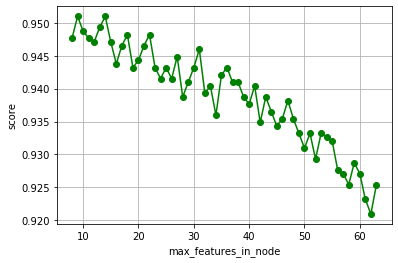

In [100]:
%pylab inline
pylab.grid(True)
pylab.plot(max_features_in_node, score_features, 'g-', marker='o', label='train')
pylab.xlabel('max_features_in_node')
pylab.ylabel('score')

#pylab.ylim((0.0, 1.05))
#pylab.legend(loc='lower right')

In [104]:
max_depth_n=np.arange(1,20,1)
score_depth=np.zeros(max_depth_n.size)
for number in range(max_depth_n.size):
    RF2=ensemble.RandomForestClassifier(n_estimators=100,max_depth=max_depth_n[number]).fit(X,y)
    score_4=cross_val_score(RF2,X,y,cv=10).mean()
    score_depth[number]=score_4

Populating the interactive namespace from numpy and matplotlib


/Users/ekaterinakryukova/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['number']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0, 0.5, 'score')

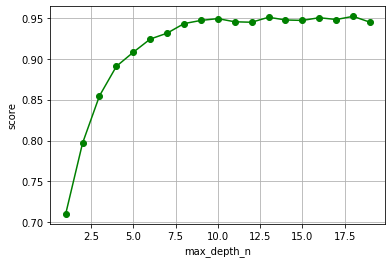

In [105]:
%pylab inline
pylab.grid(True)
pylab.plot(max_depth_n, score_depth, 'g-', marker='o', label='train')
pylab.xlabel('max_depth_n')
pylab.ylabel('score')

#pylab.ylim((0.0, 1.05))
#pylab.legend(loc='lower right')